In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#To split Dataset into Train and test
from sklearn.model_selection import train_test_split

In [3]:
#Load Titanic Dataset with Limited Feature
Train_Data=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [4]:
#Display Dataset with 5 rows
Train_Data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
# Find total number of roew having  null values
Train_Data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
# Find total percentage of NA
Train_Data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [7]:
# Lets Split datset into Train and Test Dataset
X_train, X_test, y_train, y_test = train_test_split(Train_Data,Train_Data.Survived,test_size=0.3,random_state=0)

In [8]:
X_train.shape,X_test.shape

((623, 3), (268, 3))

In [9]:
#Function to create 2 extra variable with filling NA or median
    
def fill_na(df,variable,median):
    #print("ssssss : ",X_train[variable])
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_zero']=df[variable].fillna(0)

In [10]:
fill_na(X_train,'Age', X_train.Age.median())
X_train.head(15)

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Survived,Age,Fare,Age_median,Age_zero
857,1,51.0,26.5500,51.0,51.0
52,1,49.0,76.7292,49.0,49.0
386,0,1.0,46.9000,1.0,1.0
124,0,54.0,77.2875,54.0,54.0
578,0,NaN,14.4583,29.0,0.0
549,1,8.0,36.7500,8.0,8.0
118,0,24.0,247.5208,24.0,24.0
12,0,20.0,8.0500,20.0,20.0
157,0,30.0,8.0500,30.0,30.0
127,1,24.0,7.1417,24.0,24.0


In [11]:
fill_na(X_train,'Age', X_test.Age.median())

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
print("Orginal Variance of Age feature is : ",X_train['Age'].std())
print("Variance after medain imputaion of Age feature is : ",X_train['Age_median'].std())
print("Variance after Zero imputaion of Age feature is : ",X_train['Age_zero'].std())

Orginal Variance of Age feature is :  14.506993804588443
Variance after medain imputaion of Age feature is :  13.070766614648445
Variance after Zero imputaion of Age feature is :  17.60095360447329


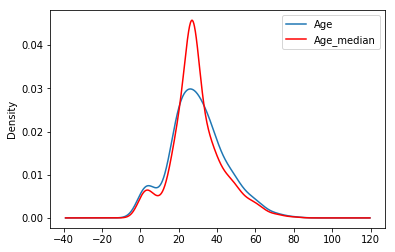

In [13]:
#Gaussian Distribution for imputed Median Feature of Age
fig=plt.figure()
ax=fig.add_subplot(111)
X_train[X_train.Age !=0]['Age'].plot(kind="kde",ax=ax)
X_train.Age_median.plot(kind="kde",ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

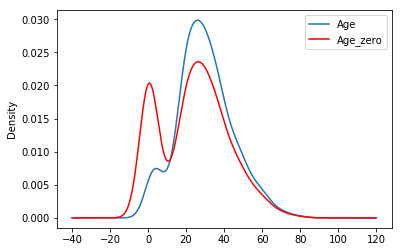

In [14]:
#Gaussian Distribution for imputed Zero Feature of Age
fig=plt.figure()
ax=fig.add_subplot(111)
X_train[X_train.Age !=0]['Age'].plot(kind="kde",ax=ax)
X_train.Age_zero.plot(kind="kde",ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')